# Downloading Dataset

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [22]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 147MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s]


In [23]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Modules

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

# Create Dataframe for input and output

In [25]:
# generators
train_ds= tf.keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds= tf.keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
# Normalize
def process(image,label):
  image= tf.cast(image/255, tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds = validation_ds.map(process)



In [27]:
# create cnn model

model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
history=model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 107ms/step - loss: 1.1125 - accuracy: 0.6335 - val_loss: 0.6125 - val_accuracy: 0.6412
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5169 - accuracy: 0.7454 - val_loss: 0.5249 - val_accuracy: 0.7448
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4471 - accuracy: 0.7930 - val_loss: 0.5000 - val_accuracy: 0.7538
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3750 - accuracy: 0.8338 - val_loss: 0.4236 - val_accuracy: 0.8132
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3206 - accuracy: 0.8586 - val_loss: 0.7064 - val_accuracy: 0.6790
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2486 - accuracy: 0.8954 - val_loss: 0.7128 - val_accuracy: 0.7812
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1699 - accuracy: 0.9298 - val_loss: 0.7688 - val_ac

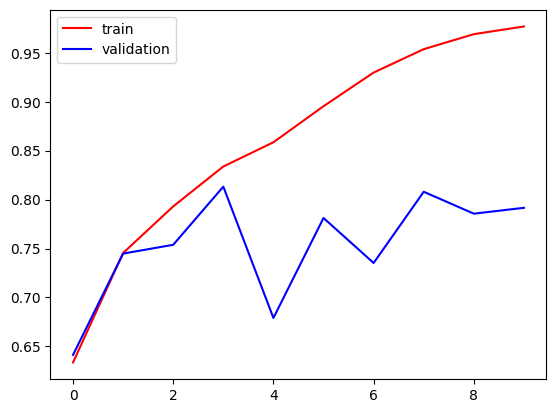

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

In [41]:
import cv2

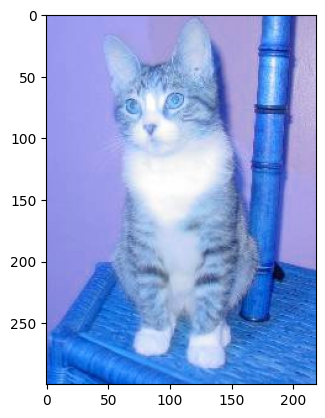

In [51]:
test_img =cv2.imread('/content/dogs_vs_cats/test/cats/cat.10007.jpg')
plt.imshow(test_img)

In [52]:
test_img.shape

(300, 219, 3)

In [53]:
test_img = cv2.resize(test_img,(256,256))
test_input= test_img.reshape((1,256,256,3))

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

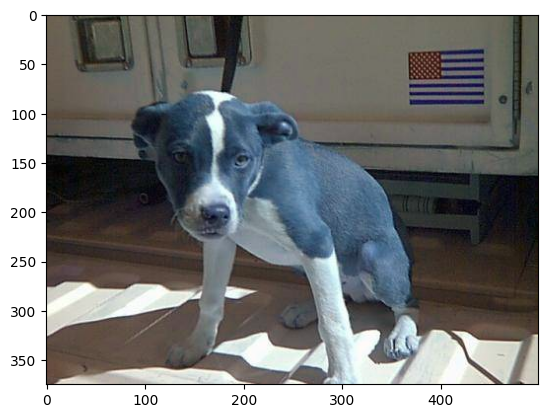

In [58]:
test_img =cv2.imread('/content/dogs_vs_cats/test/dogs/dog.10027.jpg')
plt.imshow(test_img)

In [59]:
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input= test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)